<a href="https://colab.research.google.com/github/Rocking-Priya/Mod-C-Summer-2025-Week-1--6-assignment/blob/main/Deshpande_Priyanka__Week_9__Mod_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>





Task For Week 9: Include ideas such as gradient boost, learning rate, number of estimators, tree depth, and regularization.

Dataset 1

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
phishing_df = pd.read_csv('/content/dataset_phishing.csv')
phishing_df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [3]:
phishing_df.duplicated().sum()

np.int64(0)

In [4]:
object_cols =phishing_df.select_dtypes(include='object').columns

In [5]:
phishing_df.select_dtypes(exclude='object').columns

Index(['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at',
       'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore', 'nb_tilde',
       'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 'nb_hyp

In [6]:
# Apply One-Hot Encoding
# drop_first=True is used to avoid multicollinearity
phishing_df_encoded = pd.get_dummies(phishing_df, columns=object_cols, drop_first=True)

# Display the first few rows of the encoded DataFrame to see the changes
print("\nDataFrame after One-Hot Encoding:")
display(phishing_df_encoded.head())

# Display the info of the encoded DataFrame to see the new column count and types
print("\nInfo of the encoded DataFrame:")
phishing_df_encoded.info()


DataFrame after One-Hot Encoding:


,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,url_https://zabor-vn.com/system/csvprice_pro/smart/customer_center/customer-IDPP00C354/myaccount/signin/,url_https://zemanconstruction-my.sharepoint.com/:b:/p/terryk/EXcen8LOhvhHtAbKw817hlIBzcnJQfsRCSFJIUkX8lA06Q?e=txoNfr,url_https://zgz5b.codesandbox.io/,url_https://zipansion.com/3lqqn,url_https://zmail221.appspot.com,url_https://zonasegura1.bn.com.multiservicioswebther.com/BNlWeb/lnicio/logins.do,url_https://zoomic.io/wp-includes/neworder/bizmail.php?email=&amp;_rand=13vqcr8bp0gud&amp;lc=1033&amp;id=64855&amp;mkt=en-us&amp;cbcxt=mai&amp;snsc=1,url_https://zoryanvk.wordpress.com/,url_https://zrq2y.weblium.site/,status_phishing
0,37,19,0,3,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,77,23,1,1,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
2,126,50,1,4,1,0,1,2,0,3,...,False,False,False,False,False,False,False,False,False,True
3,18,11,0,2,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,55,15,0,2,2,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False



Info of the encoded DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Columns: 11516 entries, length_url to status_phishing
dtypes: bool(11429), float64(13), int64(74)
memory usage: 132.2 MB


In [7]:
phishing_df_encoded.columns

Index(['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at',
       'nb_qm', 'nb_and', 'nb_or', 'nb_eq',
       ...
       'url_https://zabor-vn.com/system/csvprice_pro/smart/customer_center/customer-IDPP00C354/myaccount/signin/',
       'url_https://zemanconstruction-my.sharepoint.com/:b:/p/terryk/EXcen8LOhvhHtAbKw817hlIBzcnJQfsRCSFJIUkX8lA06Q?e=txoNfr',
       'url_https://zgz5b.codesandbox.io/', 'url_https://zipansion.com/3lqqn',
       'url_https://zmail221.appspot.com',
       'url_https://zonasegura1.bn.com.multiservicioswebther.com/BNlWeb/lnicio/logins.do',
       'url_https://zoomic.io/wp-includes/neworder/bizmail.php?email=&amp;_rand=13vqcr8bp0gud&amp;lc=1033&amp;id=64855&amp;mkt=en-us&amp;cbcxt=mai&amp;snsc=1',
       'url_https://zoryanvk.wordpress.com/',
       'url_https://zrq2y.weblium.site/', 'status_phishing'],
      dtype='object', length=11516)

In [8]:


# Separate the features (X) and the target variable (y)
X = phishing_df_encoded.drop('status_phishing', axis=1)  # Use the correct column name after encoding
y = phishing_df_encoded['status_phishing']  # This should be your label (0 or 1)

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (9144, 11515)
Testing set shape: (2286, 11515)


In [9]:


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
# Initialize and train Gradient Boosting model
gb_model = GradientBoostingClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=3,
    subsample=1.0,
    random_state=42
)
gb_model.fit(X_train_scaled, y_train)

# Make predictions and evaluate
y_pred = gb_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy, conf_matrix, report

(0.9584426946631671,
 array([[1110,   47],
        [  48, 1081]]),
 '              precision    recall  f1-score   support\n\n       False       0.96      0.96      0.96      1157\n        True       0.96      0.96      0.96      1129\n\n    accuracy                           0.96      2286\n   macro avg       0.96      0.96      0.96      2286\nweighted avg       0.96      0.96      0.96      2286\n')

Dataset 2

In [12]:
email_df = pd.read_csv('/content/Phishing_Email.csv')
email_df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [13]:
df = email_df.drop(columns=['Unnamed: 0'])

In [14]:
df.isnull().sum()

,0
Email Text,16
Email Type,0


In [15]:
df = df.dropna()

In [16]:
df.isnull().sum()

,0
Email Text,0
Email Type,0


In [17]:
df.duplicated().sum()

np.int64(1096)

In [18]:
df = df.drop_duplicates()


In [19]:
df.duplicated().sum()

np.int64(0)

In [20]:
df['Email Type'] = df['Email Type'].map({'Safe Email': 0, 'Phishing Email': 1})


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
X = TfidfVectorizer().fit_transform(df['Email Text'])


In [22]:
y = df['Email Type']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy: 0.9375712656784493

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      2213
           1       0.92      0.91      0.91      1295

    accuracy                           0.94      3508
   macro avg       0.93      0.93      0.93      3508
weighted avg       0.94      0.94      0.94      3508



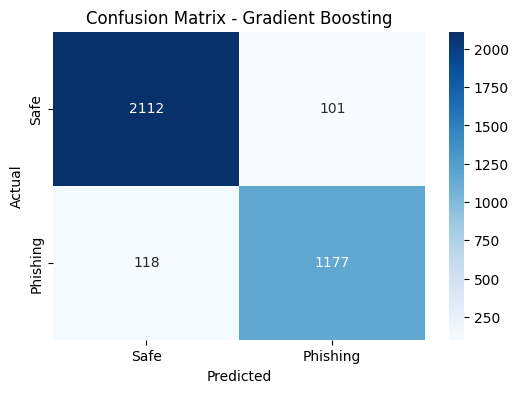

In [24]:


# Define Gradient Boosting model with key parameters
gb_model = GradientBoostingClassifier(
    learning_rate=0.1,        # how fast the model learns
    n_estimators=100,         # number of trees (more = better accuracy, longer training)
    max_depth=3,              # tree depth (controls complexity)
    subsample=0.8,            # fraction of samples used (regularization)
    random_state=42
)

# Fit model to training data
gb_model.fit(X_train, y_train)

# Predict on test set
y_pred = gb_model.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=["Safe", "Phishing"], yticklabels=["Safe", "Phishing"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()


Dataset 3

In [25]:
df_3 = pd.read_csv('/content/2022-12-09-enriched.csv')
df_3.head()

,cve_id,vendor_project,product,vulnerability_name,date_added,short_description,required_action,due_date,notes,grp,pub_date,cvss,cwe,vector,complexity,severity
0,CVE-2021-27104,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,2021-02-16,9.8,CWE-78,NETWORK,LOW,CRITICAL
1,CVE-2021-27102,accellion,FTA,Accellion FTA OS Command Injection Vulnerability,2021-11-03,Accellion FTA 9_12_411 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
2,CVE-2021-27101,accellion,FTA,Accellion FTA SQL Injection Vulnerability,2021-11-03,Accellion FTA 9_12_370 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
3,CVE-2021-27103,accellion,FTA,Accellion FTA SSRF Vulnerability,2021-11-03,Accellion FTA 9_12_411 and earlier is affected...,Apply updates per vendor instructions.,2021-11-17,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
4,CVE-2021-21017,adobe,Acrobat and Reader,Adobe Acrobat and Reader Heap-based Buffer Ove...,2021-11-03,Acrobat Reader DC versions versions 2020.013.2...,Apply updates per vendor instructions.,2021-11-17,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
df_3_clean = df_3.drop(columns=['notes', 'pub_date', 'cvss', 'cwe', 'vector', 'complexity', 'severity'])

In [27]:
df_3_clean.isnull().sum()


,0
cve_id,0
vendor_project,0
product,1
vulnerability_name,0
date_added,0
short_description,6
required_action,0
due_date,0
grp,0


In [28]:
df_3_clean = df_3_clean.dropna()

In [29]:
df_3_clean.isnull().sum()

,0
cve_id,0
vendor_project,0
product,0
vulnerability_name,0
date_added,0
short_description,0
required_action,0
due_date,0
grp,0


In [30]:
df_3_clean.duplicated().sum()

np.int64(0)

In [31]:
numeric_cols = df_3_clean.select_dtypes(include='number').columns.tolist()
categorical_cols = df_3_clean.select_dtypes(include='object').columns.tolist()

In [32]:
print("Numeric Columns:", numeric_cols)
print("Categorical Columns:", categorical_cols)

Numeric Columns: ['grp']
Categorical Columns: ['cve_id', 'vendor_project', 'product', 'vulnerability_name', 'date_added', 'short_description', 'required_action', 'due_date']


In [33]:
X = df_3_clean.drop(columns=['grp'])
y = df_3_clean['grp']

In [34]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [35]:
categorical_cols = X.select_dtypes(include='object').columns.tolist()
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')

In [36]:
X_encoded = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [37]:
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Accuracy: 0.9532163742690059

Classification Report:
               precision    recall  f1-score   support

           1       0.87      1.00      0.93        55
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         6
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       0.00      0.00      0.00         1
          11       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00        20
          17       1.00      1.00      1.00         3
          19       1.00      1.00      1.00        16
          20       1.00    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


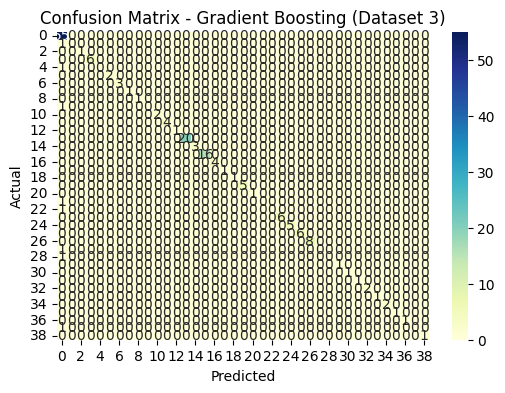

In [38]:


# Initialize Gradient Boosting model with key parameters
gb_model = GradientBoostingClassifier(
    learning_rate=0.1,        # how quickly the model learns
    n_estimators=100,         # number of trees (boosting rounds)
    max_depth=3,              # depth of each tree (controls complexity)
    subsample=0.8,            # fraction of samples used for each tree (regularization)
    random_state=42
)

# Fit the model
gb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = gb_model.predict(X_test_scaled)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix - Gradient Boosting (Dataset 3)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
